# Classification of Mobile´s Price

Author:Claudia Magliano
Date: 15/04/2024

# INICIALIZAÇÃO

### Importacao de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('mobile.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df1.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [5]:
# dimnesões da base
df1.shape

(2000, 21)

### Indicar a semente inicial e para divisão da base em treino e teste

In [6]:
np.random.seed(0)  # semente inicial

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'price_range'],
                                                    df1['price_range'],
                                                    test_size=0.3,
                                                    stratify=df1.price_range)

In [8]:
y_test.value_counts()

price_range
2    150
0    150
1    150
3    150
Name: count, dtype: int64

In [9]:
y_train.value_counts()

price_range
3    350
1    350
0    350
2    350
Name: count, dtype: int64

In [10]:
x_train.shape

(1400, 20)

In [11]:
# alguns dados estatisticos por atributo
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1400.0,1239.501429,437.142296,501.0,854.75,1226.0,1614.25,1998.0
blue,1400.0,0.490714,0.500092,0.0,0.00,0.0,1.00,1.0
clock_speed,1400.0,1.501571,0.808964,0.5,0.70,1.5,2.20,3.0
dual_sim,1400.0,0.517857,0.499860,0.0,0.00,1.0,1.00,1.0
fc,1400.0,4.294286,4.375410,0.0,1.00,3.0,7.00,19.0
four_g,1400.0,0.509286,0.500092,0.0,0.00,1.0,1.00,1.0
int_memory,1400.0,32.123571,18.008370,2.0,16.00,32.0,47.00,64.0
m_dep,1400.0,0.500786,0.286919,0.1,0.20,0.5,0.70,1.0
mobile_wt,1400.0,139.869286,35.534931,80.0,109.00,140.5,170.00,200.0
n_cores,1400.0,4.540714,2.305427,1.0,3.00,4.0,7.00,8.0


## Análise exploratória

### Dispersão

#### Visualização RAM x INT_MEMORY (Internal Memory in Gigabytes) e cores comos as classes de saída (PRICE_RANGE)

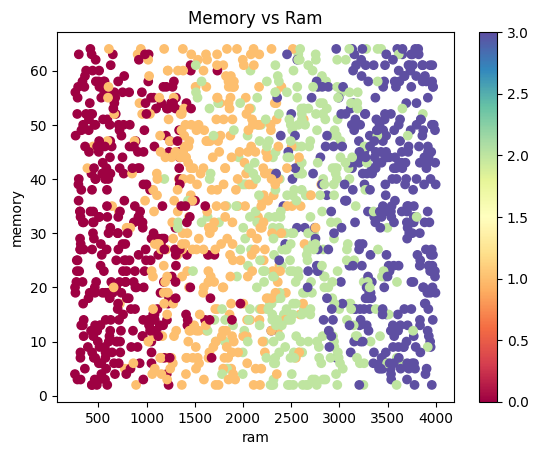

In [12]:
plt.scatter(x_train['ram'], x_train['int_memory'], c=y_train, cmap=plt.cm.Spectral);
plt.colorbar();
plt.xlabel('ram');
plt.ylabel('memory');
plt.title('Memory vs Ram');

A variação de memória RAM impacta diretamente o valor do celular mas o mesmo não acontece com a mémoria de armazenamento.

#### Visualização PRICE_RANGE x BATTERY_POWER e cores comos as classes de saída (PRICE_RANGE)

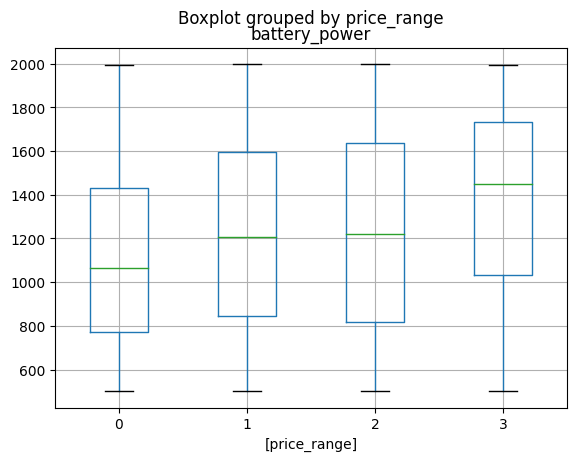

In [13]:
df1.boxplot(column=['battery_power'], by=['price_range']);

Existe uma correlação grande entre a quantidade de bateria e o preço do celular.

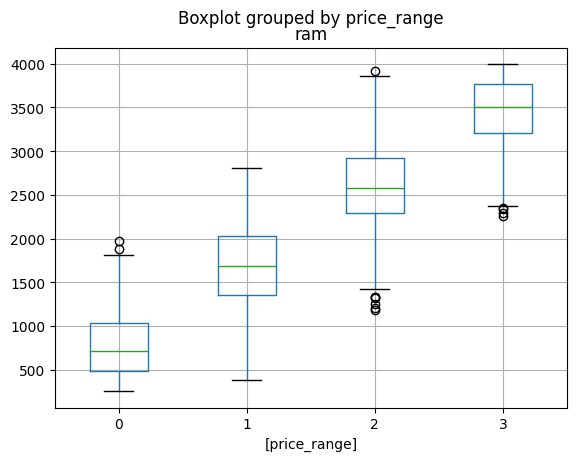

In [14]:
df1.boxplot(column = ['ram'], by= ['price_range']);

Conforme verificamos anteriormente, existe uma correlação grande entre a quantidade de memória RAM e o preço do celular.

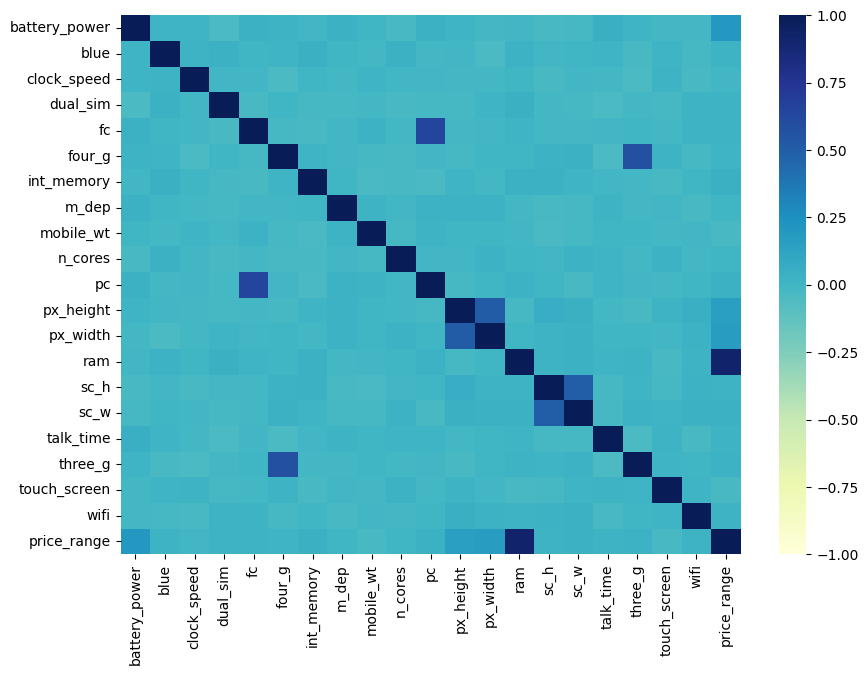

In [15]:
# análise de correlação
import seaborn as sns
plt.figure(figsize=(10,7))
corr = df1.corr()
sns.heatmap(corr,vmin=-1,vmax=1, yticklabels=True, cmap='YlGnBu',);
plt.savefig('corr.jpg')

O mapa de correlação mostra que realmente os atributos que mais afetam o preço, analisando a linha mais abaixo do gráfico, são: Bateria, pix e memória RAM.

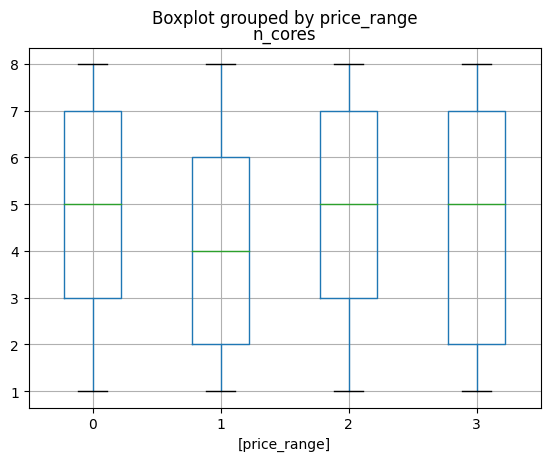

In [16]:
df1.boxplot(column = ['n_cores'], by= ['price_range']);

## **Normalizando os Dados**

A rede neural precisa receber dados normalizados. Os atributos não podem ter valores muito diferenciados.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_normalized = scaler.transform(x_train)
X_test_normalized = scaler.transform(x_test)

In [18]:
X_train_normalized[0:2]

array([[ 1.67625125, -0.98159786, -0.3729206 ,  0.96490128, -0.98180974,
        -1.01874713,  0.27088355,  0.69457067, -1.06607265, -1.10245158,
        -1.48789929,  0.14420986,  0.91488203,  0.68082246,  0.8527554 ,
        -1.34711469,  1.1199196 , -1.73205081, -1.01583972, -1.01149463],
       [-0.57324799,  1.01874713, -0.99121623, -1.03637545,  1.99040205,
         0.98159786,  1.04857765, -0.35139449, -0.22153125, -0.66853755,
         0.85751056,  0.04335261, -1.03199099,  0.20098875, -0.56204716,
        -1.1182082 ,  1.6692845 ,  0.57735027, -1.01583972,  0.98863599]])

In [20]:
X_train_normalized.max()

3.3621920990813394

In [21]:
X_train_normalized.min()

-1.7410492986740413

# Rede Neural

O keras é uma biblioteca já exsitente no tensorflow específica para redes neurais.

In [22]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers.legacy import SGD
# Otmizador é o Gradiente Descendente Estocástico

In [23]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses # O número de neurônios na camada de saída deve ser igual ao numero de classes

4

In [24]:
X_train_normalized.shape[1:]

(20,)

In [74]:
# Criando a rede neural
RN = Sequential() # Iniciando a rede neural
# input_shape é igual ao numero de colunas a ser recebido
RN.add(Dense(12, input_shape=X_train_normalized.shape[1:], activation='sigmoid'))
RN.add(Dense(10, activation = 'sigmoid'))
# A segunda camada não precisa saber o input_shape pois ela já está conectada a 1a.camada
RN.add(Dense(NumberOfClasses, activation = 'sigmoid'))
RN.summary() #exibe a rede definida

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 12)                252       
                                                                 
 dense_12 (Dense)            (None, 10)                130       
                                                                 
 dense_13 (Dense)            (None, 4)                 44        
                                                                 
Total params: 426 (1.66 KB)
Trainable params: 426 (1.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Na primeira camada aparecem 210 paramentros porque são 20 atributos x 10 neurônios + 1 bias por neurônio

In [75]:
# treinamento
from tensorflow.keras.utils import to_categorical
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 0.1947 - accuracy: 0.2536 - val_loss: 0.1878 - val_accuracy: 0.2214
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.2464 - val_loss: 0.1872 - val_accuracy: 0.2679
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.2643 - val_loss: 0.1868 - val_accuracy: 0.2821
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.2848 - val_loss: 0.1864 - val_accuracy: 0.2679
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.2946 - val_loss: 0.1858 - val_accuracy: 0.2607
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.3205 - val_loss: 0.1848 - val_accuracy: 0.3679
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.3393 - val_loss: 0.1837 - val_accuracy: 0.4357
Epoch 8/100
3

In [77]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02503182552754879
Test accuracy: 0.9566666483879089


In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

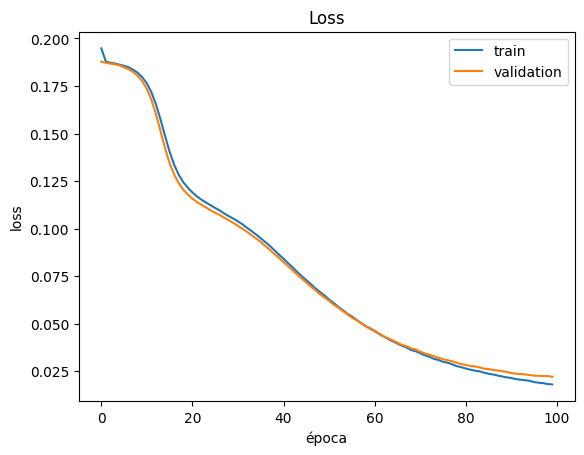

In [78]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

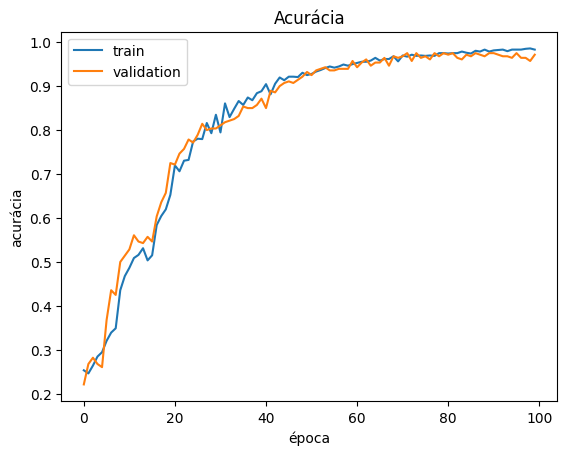

In [79]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

In [80]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted[0:2]

19/19 [==============================] - 0s 2ms/step


array([[3.9517021e-04, 3.2872986e-02, 9.0325356e-01, 6.7387678e-02],
       [9.6397722e-01, 5.4273412e-02, 1.4481593e-03, 1.6812667e-06]],
      dtype=float32)

In [81]:
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values
y_test_indexes[0:2]

array([2, 0])

In [82]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, index=['Pred 0', 'Pred 1','Pred 2','Pred 3'],
             columns=['Real 0', 'Real 1', 'Real 2', 'Real 3'],) #matriz de confusão

,Real 0,Real 1,Real 2,Real 3
Pred 0,145,7,0,0
Pred 1,5,141,4,0
Pred 2,0,2,143,5
Pred 3,0,0,3,145


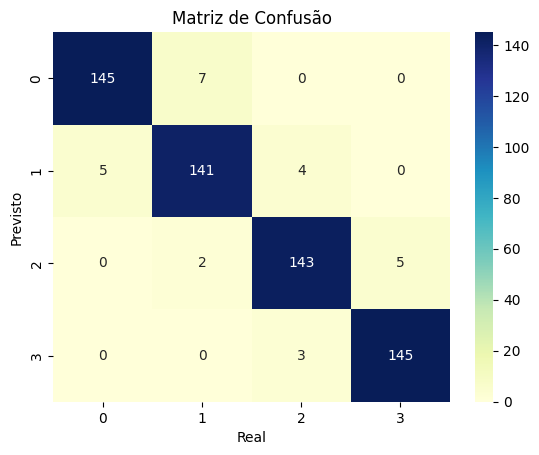

In [83]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['0', '1','2','3'])
ax.yaxis.set_ticklabels(['0', '1','2','3'])
plt.show()

## Retorne e rode novamente o modelo separando 20% do conjunto de treino para validação. Refaça os gráficos de loss e acurácia para incluir as métricas de validação também.
Dica: parâmetro validation_split da função fit().
